# Computer Vision Project – Face Detection

### Face Detection is the first and essential step for face recognition, and it is used to detect faces in the images. It is a part of object detection and can use in many areas such as security, bio-metrics, law enforcement, entertainment, personal safety, etc.

## Data Description:
    
WIDER FACE dataset is a face detection benchmark dataset, of which images are selected from the publicly available WIDER dataset.  This data have 32,203 images and 393,703 faces are labeled with a high degree of variability in scale, pose and occlusion as depicted in the sample images. In this project, we are using 409 images and around 1000 faces for ease of computation.

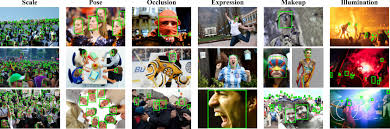

## Objective:
The goal of this project is to build a Face Detection model which includes building a face detector to locate the position of a face in an image.

In [1]:
import tensorflow as tf
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
import time
# Installing Pillow package to load Image
!pip install Pillow
from PIL import Image
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from tensorflow.keras.backend import epsilon

In [2]:
from matplotlib import image

### 1. Load npy file

In [3]:
img_array = np.load('images.npy', allow_pickle = True)

Let's check a sample image data

In [4]:
img_array[0]

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

### 2. Create Features(images) and labels(mask) using that data

###  Features and labels
    •	Here feature is the image
    •	The label is the mask
    •	Images will be stored in "X_train" array
    •	Masks will be stored in "masks" array


### Set image dimensions 

In [5]:
#Image sizes can vary (128, 160, 192, 224)
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

In [6]:
import cv2
masks = np.zeros((int(img_array.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(img_array.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(img_array.shape[0]):
    img = img_array[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in img_array[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [7]:
img.shape

(224, 224, 3)

In [8]:
X_train.shape, masks.shape

((409, 224, 224, 3), (409, 224, 224))

In [9]:
#y = np.zeros((len(masks), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)
#X = np.zeros((len(img), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)
img = cv2.resize(img, (224,224), 3)
masks = cv2.resize(masks, (224,224), 3)

X = img/255
y = masks/255
X.shape, y.shape

((224, 224, 3), (224, 224, 224))

In [10]:
from sklearn.model_selection import train_test_split
X_trains, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [11]:
X_trains.shape, y_train.shape, X_test.shape, y_test.shape

((156, 224, 3), (156, 224, 224), (68, 224, 3), (68, 224, 224))

Let's print 20 samples of images and an image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

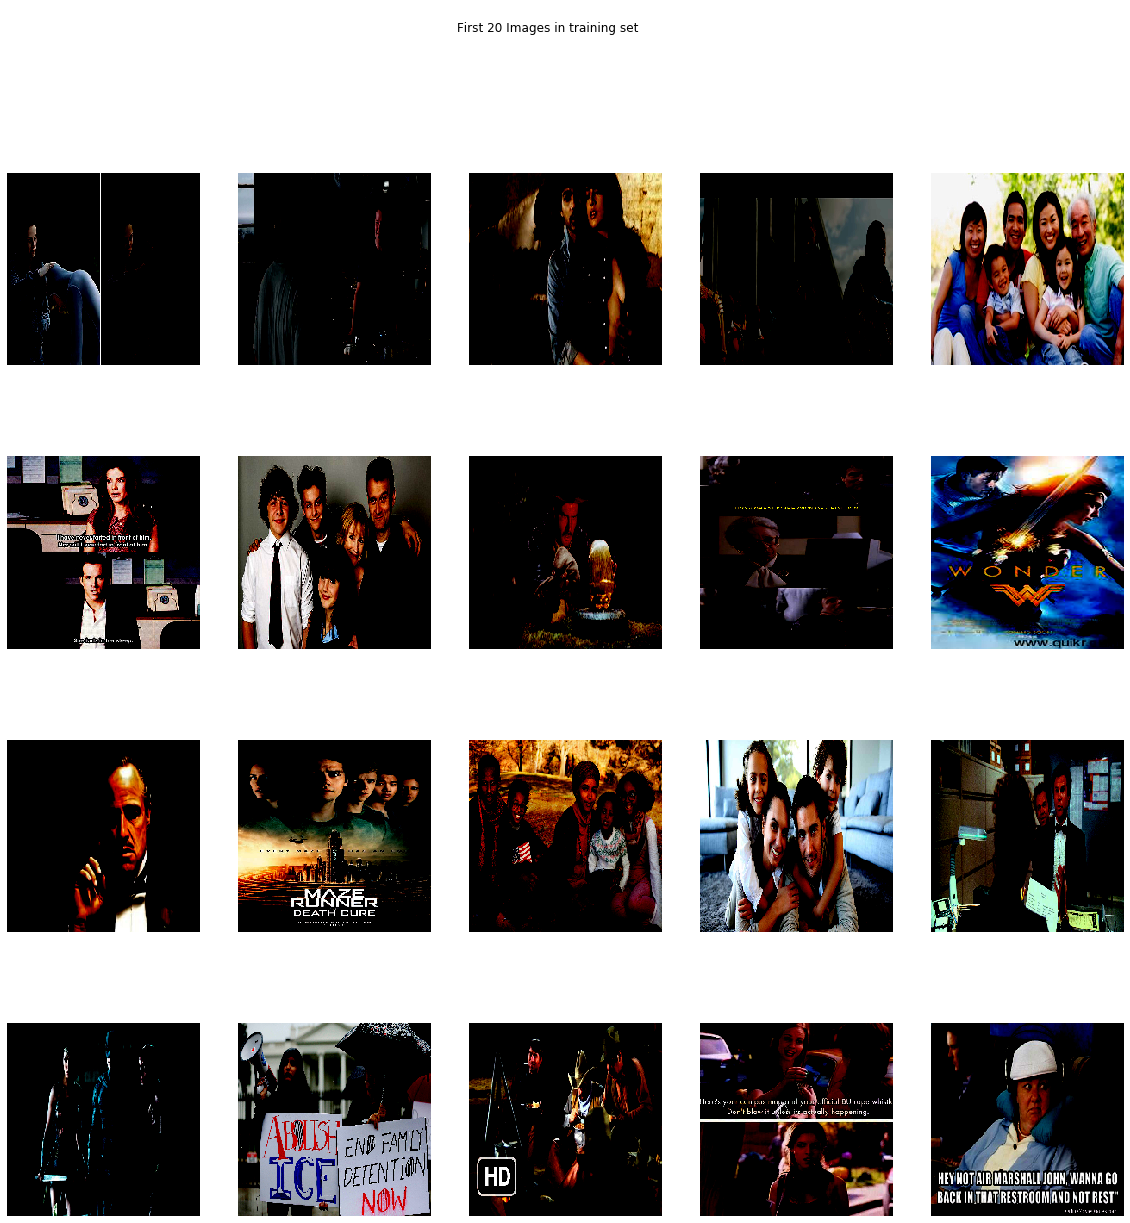

In [12]:
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.suptitle('\nFirst 20 Images in training set')
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [13]:
n = 10
print("Image array[" + str(n) + "]:")
print(X_train[n])

Image array[10]:
[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 

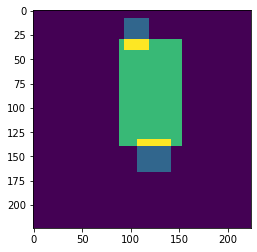

In [14]:
plt.imshow(masks[n])

### 3. Load the pretrained MobileNet model 

In [15]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

In [16]:
# Load pre-trained mobilenet
base_model = MobileNet(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3), weights='imagenet', include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Freeze the convolutional base

In [17]:
base_model.trainable = False

In [18]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [19]:
base_model.output

<tf.Tensor 'conv_pw_13_relu/Relu6:0' shape=(?, 7, 7, 1024) dtype=float32>

In [20]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

### 4. Create a model using the above model

In [21]:
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

Using TensorFlow backend.


In [27]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Input, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def unet_model(inputs, include_top = False):
    conv1 = Conv2D(56, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(56, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(112, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(112, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(224, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(224, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(448, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(448, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(896, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(896, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(448, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(448, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(448, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(224, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(224, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(224, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(112, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(112, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(112, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(56, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(56, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(56, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'softmax')(conv9)

    model = Model(input = inputs, output = conv10)

    return model

In [28]:
inputs = Input((IMAGE_WIDTH, IMAGE_HEIGHT, 3), name = 'img')
model = unet_model(inputs, include_top=False)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



C:\Users\Surya-Rekha\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("co...)`


In [29]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 56) 1568        img[0][0]                        
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 224, 224, 56) 28280       conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 56) 0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

### 5. Define the Dice Coefficient and Loss function. 

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import epsilon
from tensorflow.math import log
from tensorflow import reduce_sum

In [31]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)

    return numerator / (denominator + epsilon())

In [32]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### 6. Compile and fit the model

In [33]:
# compile model
model.compile('Adam', loss=loss, metrics=[dice_coefficient])

In [34]:
X_trains.shape[0]

156

In [35]:
X_trains = np.zeros((int(X_trains.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
y_train = np.zeros((int(X_trains.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
X_test = np.zeros((int(X_test.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
y_test = np.zeros((int(y_test.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
X_trains.shape, y_train.shape, X_test.shape, y_test.shape

((156, 224, 224, 3), (156, 224, 224, 3), (68, 224, 224, 3), (68, 224, 224, 3))

In [ ]:
# fit model
model.fit(
    x=X_trains,
    y=y_train,
    batch_size=10,    
    epochs=100,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 156 samples, validate on 68 samples
Epoch 1/100





 20/156 [==>...........................] - ETA: 10:45 - loss: 31.4610 - dice_coefficient: 0.0000e+00

### 7. Evaluate the model

In [37]:
model.evaluate(X_test, y_test, verbose=1)

68/68 [==============================] - 50s 734ms/step


[31.374347798964557, 0.0]